## Normal Imports

In [1330]:
import numpy as np
import pandas as pd
from math import isnan
import collections

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Load Data

In [ ]:
data = pd.read_csv('income_evaluation.csv')
data

In [1331]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1332]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## EDA

In [1333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1334]:
data.shape

(32561, 15)

In [1335]:
#the higher the degree, the more money
#same w education_num

In [1336]:
newColumns = [i.split(" ")[1] for i in data.columns[1:]]
newColumns

['workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [1337]:
a = ['age']
a.extend(newColumns)
a

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [1338]:
data.columns = a

In [1339]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [1340]:
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [1341]:
data['income_label'] = data.income

In [1342]:
mapping = {' <=50K': 0, ' >50K': 1}

In [1343]:
data['income_label'].map(mapping)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_label, Length: 32561, dtype: int64

In [1344]:
data['income_label'][0]

' <=50K'

In [1345]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K


In [1346]:
data.occupation[0]

' Adm-clerical'

In [1347]:
data.education[0]

' Bachelors'

In [1348]:
data.race[0]

' White'

In [1349]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [1350]:
data.occupation[0]

'Adm-clerical'

In [1351]:
data.race[0]

'White'

In [1352]:
#the above is cleaned (took out spaces...mapped label column to 0, 1)

In [1353]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [1354]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [1355]:
#naive bayes, logistic regression, decision trees, neural networks, knn

## Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

In [1357]:
#1st: determine features(columns except income and income_label) and label(income_label)
#2nd: convert categorical features to numeric
#3rd: train, test, validate, split
#4th: train the model
#5th: test the model
#go back to 2nd step: scaling, normalization, binning. then repeat 3-5
#go back to 2nd stepb, add, remove, combine pieces of data (lump together stuff(education, marital, etc)). then repeat 3-5
#collect results

In [1358]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K


In [1359]:
pd.get_dummies(data.workclass)

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,1,0,0,0,0


In [1360]:
data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: capital-gain, Length: 119, dtype: int64

In [1361]:
data.fnlwgt.max()

1484705

In [1362]:
data.fnlwgt.min()

12285

In [1363]:
#baseline
#look over pdf thing
#make 2 lists: columns to bin, columns to normalize or scale

In [1364]:
data['income_label'] = data.income

In [1365]:
data['income_label']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income_label, Length: 32561, dtype: object

In [1366]:
mapping = {'<=50K': 0, '>50K': 1}

In [1367]:
data['income_label'] = data['income_label'].map(mapping)

In [1368]:
data['income_label']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_label, Length: 32561, dtype: int64

In [1369]:
y = data['income_label']

In [1370]:
#THIS IS FOR ROUND 2
#BIN up here

In [1371]:
data2 = pd.DataFrame(data)

In [1372]:
#data2 = data2.drop(data2[data2['marital-status'] == 'Married-spouse-absent'].index)
#data2 = data2.drop(data2[data2['marital-status'] == 'Married-AF-spouse'].index)
#data2 = data2.drop(data2[data2['workclass'] == 'Without-pay'].index)
#data2 = data2.drop(data2[data2['workclass'] == 'Never-worked'].index)
#data2 = data2.drop(data2[data2['workclass'] == '?'].index)
#y = data2['income_label']

In [1373]:
#extra_male = data2[data2.sex == 'Male']
#extra_female = data2[data2.sex == 'Female']
#extra_1 = data2[data2.income_label == 1]
#extra_0 = data2[data2.income_label == 0]

In [1374]:
#change to data_balanced if shit hits the fan
#data_balanced = extra_male.sample(15000)
#data_balanced = extra_0.sample(14000)

In [1375]:
#data_balanced = pd.concat([data_balanced, extra_female])
#data_balanced = pd.concat([data_balanced, extra_1])

In [1376]:
#data_balanced = pd.concat([data_balanced, extra_1.sample(5500)])
#y = data_balanced.income_label

In [1377]:
#data_balanced = pd.concat([data_balanced, extra_female.sample(5000)])
#y = data_balanced.income_label

In [1378]:
#data_balanced.sex.value_counts()

In [1379]:
extra_1 = data2[data2.income_label == 1]
extra_0 = data2[data2.income_label == 0]
data_balanced = extra_0.sample(14000)
data_balanced = pd.concat([data_balanced, extra_1])
data_balanced = pd.concat([data_balanced, extra_1.sample(5500)])

In [1380]:
data2 = data2.drop(data2[data2['marital-status'] == 'Married-spouse-absent'].index)
data2 = data2.drop(data2[data2['marital-status'] == 'Married-AF-spouse'].index)
data2 = data2.drop(data2[data2['workclass'] == 'Without-pay'].index)
data2 = data2.drop(data2[data2['workclass'] == 'Never-worked'].index)
data2 = data2.drop(data2[data2['workclass'] == '?'].index)
data2 = data2.drop(data2[data2['occupation'] == 'Priv-house-serv'].index)
data2 = data2.drop(data2[data2['occupation'] == 'Armed-Forces'].index)
data2 = data2.drop(data2[data2['occupation'] == '?'].index)
y = data2['income_label']

In [1381]:
data2.age = pd.cut(data2.age, bins=[0,30,60,200])

In [1382]:
data2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_label
0,"(30, 60]",State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,"(30, 60]",Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,"(30, 60]",Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,"(30, 60]",Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,"(0, 30]",Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"(0, 30]",Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,"(30, 60]",Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,"(30, 60]",Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,"(0, 30]",Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [1383]:
data2['hours-per-week'] = pd.cut(data2['hours-per-week'], bins=[0,30,60,200])
data2['hours-per-week']

0        (30, 60]
1         (0, 30]
2        (30, 60]
3        (30, 60]
4        (30, 60]
           ...   
32556    (30, 60]
32557    (30, 60]
32558    (30, 60]
32559     (0, 30]
32560    (30, 60]
Name: hours-per-week, Length: 30141, dtype: category
Categories (3, interval[int64]): [(0, 30] < (30, 60] < (60, 200]]

In [1384]:
one_hot = pd.get_dummies(data)
one_hot2 = pd.get_dummies(data2)
#one_hot3 = pd.get_dummies(data_balanced)

In [1385]:
# check this data
one_hot.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_label,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1386]:
one_hot2.head()

,fnlwgt,education-num,capital-gain,capital-loss,income_label,"age_(0, 30]","age_(30, 60]","age_(60, 200]",workclass_Federal-gov,workclass_Local-gov,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,77516,13,2174,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,83311,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,215646,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,234721,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,338409,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1387]:
one_hot2.columns

Index(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'income_label', 'age_(0, 30]', 'age_(30, 60]', 'age_(60, 200]',
       'workclass_Federal-gov', 'workclass_Local-gov',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=107)

In [1388]:
#one_hot3.columns

In [1389]:
cat_vars=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
data_vars=one_hot.columns.values.tolist()
data_vars2 =one_hot2.columns.values.tolist()
#data_vars3 = one_hot3.columns.values.tolist()

In [1390]:
# get rid of the original categorical columns
to_keep=[i for i in data_vars2 if i not in cat_vars]
#to_keep2= [i for i in data_vars if i not in cat_vars2]
#data_final=one_hot[to_keep]
#data_final.columns.values
data_final2=one_hot2[to_keep]
data_final2.columns.values
#data_final3=one_hot3[to_keep2]
#data_final3.columns.values

array(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'income_label', 'age_(0, 30]', 'age_(30, 60]', 'age_(60, 200]',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupatio

In [1391]:
#normalize and scaling
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
data_final2.fnlwgt = data_final2.fnlwgt/data_final2.fnlwgt.max()
data_final2['education-num'] = preprocessing.scale(data_final2['education-num'])
#data_final2['capital-gain'] = data_final2['capital-gain']/data_final2['capital-gain'].max()
#data_final2['capital-loss'] = data_final2['capital-loss']/data_final2['capital-loss'].max()

In [1392]:
data_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_label,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1393]:
#X = data_final.loc[:, one_hot.columns != 'income_label']
X2 = data_final2.loc[:, one_hot2.columns != 'income_label']
#X3 = data_final3.loc[:, one_hot2.columns != 'income_label']

In [1394]:
#X = X.drop(columns = ['income_<=50K', 'income_>50K'])
X2 = X2.drop(columns = ['income_<=50K', 'income_>50K'])
#X3 = X3.drop(columns = ['income_<=50K', 'income_>50K'])

In [1395]:
#X
X2.columns
#X3

Index(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'age_(0, 30]', 'age_(30, 60]', 'age_(60, 200]', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=104)

In [1413]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# train test split - 70/30 for now
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1414]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [1415]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4218  333]
 [ 556  922]]


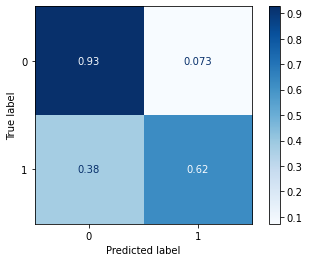

In [1416]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [308]:
y.value_counts()

0    14000
1    13341
Name: income_label, dtype: int64

In [58]:
data.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [59]:
data.age.max()

90

In [60]:
data.age.min()

17

In [ ]:
#now what?
#I want to normalize/scale numerical columns except for age
#normalized_X = preprocessing.normalize(X)
#standardized_X = preprocessing.scale(X)
#I want to bin ages...below 30, 30-60, above 60
#bins = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#binned_X = bins.fit_transform(X)

In [72]:
data.age = pd.cut(data.age, bins=[0,30,60,200])

0        (30, 60]
1        (30, 60]
2        (30, 60]
3        (30, 60]
4         (0, 30]
           ...   
32556     (0, 30]
32557    (30, 60]
32558    (30, 60]
32559     (0, 30]
32560    (30, 60]
Name: age, Length: 32561, dtype: category
Categories (3, interval[int64]): [(0, 30] < (30, 60] < (60, 200]]

In [85]:
data_final2
#finalweight needs to be normalized or binned
#education number should be scaled
#capital gain and loss normalized
#hr per week = binned


,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_label,"age_(0, 30]","age_(30, 60]","age_(60, 200]",workclass_?,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,77516,13,2174,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,83311,13,0,0,13,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,215646,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,234721,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,338409,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,257302,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,154374,9,0,0,40,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,151910,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,201490,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [94]:
preprocessing.normalize(np.array(data_final2.fnlwgt).reshape(-1,1))[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [95]:
#NORMALIZE
#data_final2.fnlwgt = data_final2.fnlwgt/data_final2.fnlwgt.max()

0        0.052210
1        0.056113
2        0.145245
3        0.158093
4        0.227930
           ...   
32556    0.173302
32557    0.103976
32558    0.102317
32559    0.135710
32560    0.193929
Name: fnlwgt, Length: 32561, dtype: float64

In [96]:
#standardized_X = preprocessing.scale(X)
#data_final2['education-num'] = preprocessing.scale(data_final2['education-num'])

array([ 1.13473876,  1.13473876, -0.42005962, ..., -0.42005962,
       -0.42005962, -0.42005962])

In [ ]:
#maybe check some outliers, scatterplots
#look at hrs worked for example
#check this w value_counts()

#clf = tree.DecisionTreeClassifier(criterion='entropy') #or gini instead\
#clf.fit(X_train,y_train)
#clf.score(X_test,y_test)

#if i need to drop certain things...data2 = data2.drop(data2[data2.age < 13])


In [200]:
data_final2['hours-per-week'].max()

99

In [324]:
data['hours-per-week'].value_counts()

(30, 60]     26206
(0, 30]       5245
(60, 200]     1110
Name: hours-per-week, dtype: int64

In [1065]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini') #entropy or gini instead\
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8060736095065192

In [364]:
data[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [365]:
data[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [51]:
data['income_label'].value_counts()

0    24720
1     7841
Name: income_label, dtype: int64

In [317]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [1235]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [59]:
extra_male = data2[data2.sex == 'Male']
extra_female = data2[data2.sex == 'Female']

In [60]:
data_balanced = extra_male.sample(15000)

In [62]:
data_balanced = pd.concat([data_balanced, extra_female])

In [63]:
data_balanced.sex.value_counts()

Male      15000
Female    10552
Name: sex, dtype: int64

In [64]:
data_balanced = pd.concat([data_balanced, extra_female.sample(5000)])
y = data_balanced.income_label

In [65]:
data_balanced.sex.value_counts()

Female    15552
Male      15000
Name: sex, dtype: int64

In [66]:
data_balanced['income_label'].value_counts()

0    24261
1     6291
Name: income_label, dtype: int64

In [67]:
extra_1 = data2[data2.income_label == 1]
extra_0 = data2[data2.income_label == 0]

In [68]:
data_balanced = extra_0.sample(14000)

In [69]:
data_balanced = pd.concat([data_balanced, extra_1])

In [70]:
data_balanced.sex.value_counts()

Male      15285
Female     6512
Name: sex, dtype: int64

In [71]:
data_balanced = pd.concat([data_balanced, extra_1.sample(5500)])
y = data_balanced.income_label

In [72]:
data_balanced.sex.value_counts()

Male      19988
Female     7309
Name: sex, dtype: int64

In [73]:
data_balanced.income_label.value_counts()

0    14000
1    13297
Name: income_label, dtype: int64